In [244]:
#Import libraries 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm

In [246]:
#Import dataset
Ames = pd.read_csv('Ames_HousePrice.csv')

In [248]:
Ames.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [250]:
Ames.isnull().sum().head()

Unnamed: 0    0
PID           0
GrLivArea     0
SalePrice     0
MSSubClass    0
dtype: int64

In [252]:
#Linear Regression Model setup
x = Ames.iloc[:,2].values
y = Ames.iloc[:,3].values

In [254]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

In [256]:
x_test = x_test.reshape(-1,1)
x_train = x_train.reshape(-1,1)
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [258]:
lin_reg_pred = lin_reg.predict(x_test)
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)
print("Mean squared error: %2f"
     % mean_squared_error(y_test, lin_reg_pred))
print("R2:", r2_score(y_test, lin_reg_pred))

Coefficients: [112.41903526]
Intercept: 10031.85736619911
Mean squared error: 2788181355.829332
R2: 0.4959023393380704


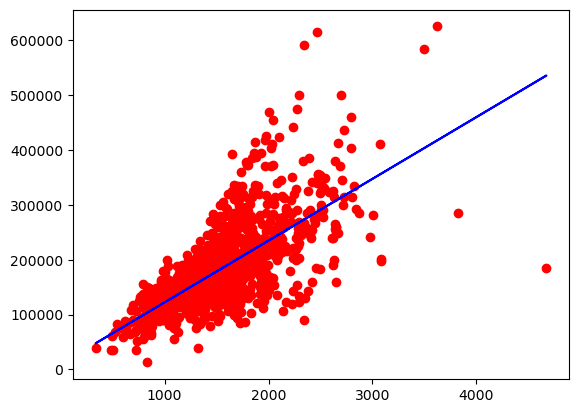

In [260]:
#Linear Regression Model
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, lin_reg_pred, color = 'blue')
plt.show()

In [264]:
#Numerics only dataframe 
df_numerics_only = Ames.select_dtypes(include=np.number)
df_numerics_only = df_numerics_only.dropna(axis=1)
df_numerics_only.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,909176150,856,126000,30,7890,6,6,1939,1950,...,1,0,0,0,0,166,0,0,3,2010
1,2,905476230,1049,139500,120,4235,5,5,1984,1984,...,0,0,105,0,0,0,0,0,2,2009
2,3,911128020,1001,124900,30,6060,5,9,1930,2007,...,0,154,0,42,86,0,0,0,11,2007
3,4,535377150,1039,114000,70,8146,4,8,1900,2003,...,0,0,0,168,0,111,0,0,5,2009
4,5,534177230,1665,227000,60,8400,8,6,2001,2001,...,0,0,45,0,0,0,0,0,11,2009


In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
cols = ['Feature', 'Model', 'Score']
models = []

for feature in df_numerics_only.columns:
    if feature != 'SalePrice':  # Avoid using the target as an independent variable
        X = df_numerics_only[[feature]]  # Independent variable
        y = df_numerics_only['SalePrice']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        models.append((feature, model, score))
result = pd.DataFrame(models, columns = cols)
result = result.sort_values(by='Score', ascending=False)
print(result)

        

          Feature               Model     Score
5     OverallQual  LinearRegression()  0.603348
2       GrLivArea  LinearRegression()  0.485514
9        1stFlrSF  LinearRegression()  0.434301
7       YearBuilt  LinearRegression()  0.307145
8    YearRemodAdd  LinearRegression()  0.287103
12       FullBath  LinearRegression()  0.233842
16   TotRmsAbvGrd  LinearRegression()  0.216598
17     Fireplaces  LinearRegression()  0.198396
18     WoodDeckSF  LinearRegression()  0.123718
19    OpenPorchSF  LinearRegression()  0.092938
4         LotArea  LinearRegression()  0.087269
13       HalfBath  LinearRegression()  0.068927
10       2ndFlrSF  LinearRegression()  0.041336
6     OverallCond  LinearRegression()  0.013524
20  EnclosedPorch  LinearRegression()  0.012716
1             PID  LinearRegression()  0.010186
22    ScreenPorch  LinearRegression()  0.007639
15   KitchenAbvGr  LinearRegression()  0.006039
11   LowQualFinSF  LinearRegression() -0.003314
0      Unnamed: 0  LinearRegression() -0

In [268]:
#Finding missing values for numeric columns 
import numpy as np
missing_data = Ames.isnull().sum()
data_type = Ames.dtypes

missing_info = pd.DataFrame({'Missing Values': missing_data,'Data Type':data_type})
 
missing_info = missing_info.sort_values(by='Missing Values', ascending=False)
 
print(missing_info[(missing_info['Missing Values'] > 0)
                   & (missing_info['Data Type'] == np.number)])

              Missing Values Data Type
LotFrontage              462   float64
GarageYrBlt              129   float64
MasVnrArea                14   float64
BsmtHalfBath               2   float64
BsmtFullBath               2   float64
GarageArea                 1   float64
GarageCars                 1   float64
BsmtUnfSF                  1   float64
BsmtFinSF2                 1   float64
BsmtFinSF1                 1   float64
TotalBsmtSF                1   float64


In [278]:
#Filling missing values in numeric only columns 
concise_info = pd.DataFrame(columns=['Feature', 'Missing Values After Imputation', 
                                     'Mean Value Used to Impute'])
 
missing_numeric_df = missing_info[(missing_info['Missing Values'] > 0)
                           & (missing_info['Data Type'] == np.number)]
 
for item in missing_numeric_df.index.tolist():
    mean_value = Ames[item].mean(skipna=True)
    Ames[item].ffill(mean_value, inplace=True)
 
    concise_info.loc[len(concise_info)] = pd.Series({
        'Feature': item,
        'Missing Values After Imputation': Ames[item].isnull().sum(),
        'Mean Value Used to Impute': mean_value
    })
concise_info

TypeError: NDFrame.ffill() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [272]:
#New Ames numeric only dataset with filled in missing data
Ames.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,68.516053,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.000000,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.000000,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.000000,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [284]:
for feature in Ames.columns:
    encoder = OneHotEncoder(drop='first')
    X_encoded = encoder.fit_transform(Ames[[feature]])
    # Initialize the linear regression model
    model = LinearRegression()
    # Perform 5-fold cross-validation and calculate R^2 scores
    scores = cross_val_score(model, X_encoded, y)
    mean_score = scores.mean()
    # Store the mean R^2 score
    feature_scores[feature] = mean_score
    print(feature_scores)

NameError: name 'feature_scores' is not defined

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
target = df_numerics_only.SalePrice
cols = ['Feature', 'Model', 'Score']
models = []

for feature in df_numerics_only.columns:
    if feature != 'SalePrice':  # Avoid using the target as an independent variable
        X = df_numerics_only[[feature]]  # Independent variable
        y = df_numerics_only['SalePrice']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        models.append((feature, model, score))
result = pd.DataFrame(models, columns = cols)
result = result.sort_values(by='Score', ascending=False)
print(result)


          Feature               Model     Score
5     OverallQual  LinearRegression()  0.603348
2       GrLivArea  LinearRegression()  0.485514
9        1stFlrSF  LinearRegression()  0.434301
7       YearBuilt  LinearRegression()  0.307145
8    YearRemodAdd  LinearRegression()  0.287103
12       FullBath  LinearRegression()  0.233842
16   TotRmsAbvGrd  LinearRegression()  0.216598
17     Fireplaces  LinearRegression()  0.198396
18     WoodDeckSF  LinearRegression()  0.123718
19    OpenPorchSF  LinearRegression()  0.092938
4         LotArea  LinearRegression()  0.087269
13       HalfBath  LinearRegression()  0.068927
10       2ndFlrSF  LinearRegression()  0.041336
6     OverallCond  LinearRegression()  0.013524
20  EnclosedPorch  LinearRegression()  0.012716
1             PID  LinearRegression()  0.010186
22    ScreenPorch  LinearRegression()  0.007639
15   KitchenAbvGr  LinearRegression()  0.006039
11   LowQualFinSF  LinearRegression() -0.003314
0      Unnamed: 0  LinearRegression() -0

In [204]:
df_numerics_only.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,909176150,856,126000,30,7890,6,6,1939,1950,...,1,0,0,0,0,166,0,0,3,2010
1,2,905476230,1049,139500,120,4235,5,5,1984,1984,...,0,0,105,0,0,0,0,0,2,2009
2,3,911128020,1001,124900,30,6060,5,9,1930,2007,...,0,154,0,42,86,0,0,0,11,2007
3,4,535377150,1039,114000,70,8146,4,8,1900,2003,...,0,0,0,168,0,111,0,0,5,2009
4,5,534177230,1665,227000,60,8400,8,6,2001,2001,...,0,0,45,0,0,0,0,0,11,2009


In [206]:
concise_info

,Feature,Missing Values After Imputation,Mean Value Used to Impute
0,LotFrontage,0,68.516053
1,GarageYrBlt,0,1976.982048
2,MasVnrArea,0,99.308262
3,BsmtHalfBath,0,0.062064
4,BsmtFullBath,0,0.435221
5,GarageArea,0,466.842575
6,GarageCars,0,1.747577
7,BsmtUnfSF,0,539.10159
8,BsmtFinSF2,0,53.238852
9,BsmtFinSF1,0,444.346258


In [208]:
#Best numerical Features for R2 score
x = Ames[['GrLivArea', 'OverallQual', 'YearBuilt', '1stFlrSF',
          'GarageArea', 'TotalBsmtSF', 'YearRemodAdd', 'GarageCars', 'LotArea',
          'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'BsmtFinSF1', 'MasVnrArea']]
y = df_numerics_only.iloc[:,3].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_train, y_train)

lin_reg_pred = lin_reg.predict(x_test)            
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)
print("Mean squared error: %2f"
     % mean_squared_error(y_test, lin_reg_pred))
print("R2:", r2_score(y_test, lin_reg_pred))            

Coefficients: [ 6.56012440e+01  1.48919392e+04  2.07313217e+02  9.38956260e+00
  2.29407616e+01  2.14879835e+01  3.01188403e+02  4.84706546e+02
  6.50640858e-01  1.40947394e+03 -8.46227161e+03 -2.23645216e+04
  2.30993137e+01  2.33673605e+01]
Intercept: -1032617.3742433987
Mean squared error: 824455984.560418
R2: 0.8509399927423249


Train-Test R^2 Score: 0.8585
Cross-Validation R^2 Scores: [0.8091, 0.8599, 0.8748, 0.8561, 0.8673]
0.8534412475025605


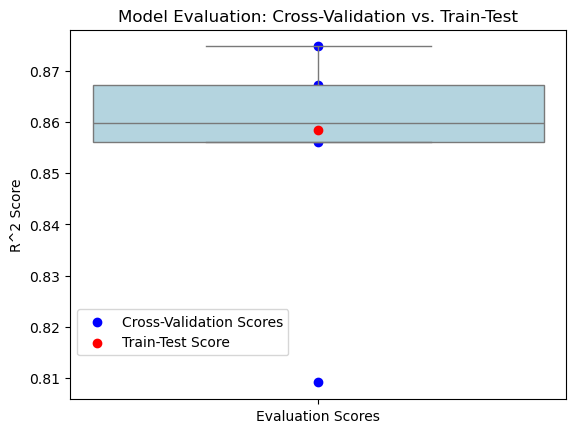

Fold 1:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.8091

Fold 2:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.8599

Fold 3:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.8748

Fold 4:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.8561

Fold 5:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.8673



In [210]:
# Import Linear Regression, Train-Test, Cross-Validation from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
# Select features and target
X = Ames[['GrLivArea', 'OverallQual', 'YearBuilt', '1stFlrSF',
          'GarageArea', 'TotalBsmtSF', 'YearRemodAdd', 'GarageCars', 'LotArea',
          'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'BsmtFinSF1', 'MasVnrArea']]
y = Ames['SalePrice']    # Target: SalePrice
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear Regression model using Train-Test
model = LinearRegression()
model.fit(X_train, y_train)
train_test_score = round(model.score(X_test, y_test), 4)
print(f"Train-Test R^2 Score: {train_test_score}")
# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
cv_scores_rounded = [round(score, 4) for score in cv_scores]
print(f"Cross-Validation R^2 Scores: {cv_scores_rounded}")
cv_mean = cv_scores.mean()
print(cv_mean)

# Import Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming cv_scores_rounded contains your cross-validation scores
# And train_test_score is your single train-test R^2 score
# Plot the box plot for cross-validation scores
cv_scores_df = pd.DataFrame(cv_scores_rounded, columns=['Cross-Validation Scores'])
sns.boxplot(data=cv_scores_df, y='Cross-Validation Scores', width=0.3, color='lightblue', fliersize=0)
# Overlay individual scores as points
plt.scatter([0] * len(cv_scores_rounded), cv_scores_rounded, color='blue', label='Cross-Validation Scores')
plt.scatter(0, train_test_score, color='red', zorder=5, label='Train-Test Score')
# Plot the visual
plt.title('Model Evaluation: Cross-Validation vs. Train-Test')
plt.ylabel('R^2 Score')
plt.xticks([0], ['Evaluation Scores'])
plt.legend(loc='lower left', bbox_to_anchor=(0, +0.1))
plt.show()
# Import K-Fold and necessary libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Select features and target
X = Ames[['GrLivArea', 'OverallQual', 'YearBuilt', '1stFlrSF',
          'GarageArea', 'TotalBsmtSF', 'YearRemodAdd', 'GarageCars', 'LotArea',
          'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr',
          'BsmtFinSF1', 'MasVnrArea']].values  # Convert to numpy array for KFold
y = Ames['SalePrice'].values    # Convert to numpy array for KFold
# Initialize Linear Regression and K-Fold
model = LinearRegression()
kf = KFold(n_splits=5)
# Manually perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Fit the model and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate and print the R^2 score for the current fold
    print(f"Fold {fold}:")
    print(f"TRAIN set size: {len(train_index)}")
    print(f"TEST set size: {len(test_index)}")
    print(f"R^2 score: {round(r2_score(y_test, y_pred), 4)}\n")

In [212]:
# Load only categorical columns without missing values from the Ames dataset
import pandas as pd
Ames = pd.read_csv('train.csv').select_dtypes(include=['object'])
print(f"The shape of the DataFrame before One Hot Encoding is: {Ames.shape}")

The shape of the DataFrame before One Hot Encoding is: (1460, 43)


In [214]:
Ames.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [216]:
# Load only categorical columns without missing values from the Ames dataset
import pandas as pd
Ames = pd.read_csv('Ames_HousePrice.csv')
print(f"The shape of the DataFrame before One Hot Encoding is: {Ames.shape}")
Ames.dtypes

The shape of the DataFrame before One Hot Encoding is: (2580, 82)


Unnamed: 0        int64
PID               int64
GrLivArea         int64
SalePrice         int64
MSSubClass        int64
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 82, dtype: object

In [242]:
#Handeling missing data in Categorical Features(Columns)
missing_data = Ames.isnull().sum()
missing_info = pd.DataFrame({'Missing Values': missing_data})
missing_info = missing_info.sort_values(by='Missing Values', ascending=False)
missing_info = missing_info[(missing_info['Missing Values'] > 0)]
missing_info

,Missing Values


In [220]:
# Imputing Missing Categorical Data
 
mode_value = Ames['Electrical'].mode()[0]
Ames['Electrical'].fillna(mode_value, inplace=True)
 
missing_categorical = missing_info[(missing_info['Missing Values'] > 0)]
 
for item in missing_categorical.index.tolist():
    Ames[item].fillna("None", inplace=True)
 
#print(Ames[missing_categorical.index].isnull().sum())

/var/folders/07/gg_37w710tvf608_n1vpzcc80000gn/T/ipykernel_4306/1652074460.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ames['Electrical'].fillna(mode_value, inplace=True)
/var/folders/07/gg_37w710tvf608_n1vpzcc80000gn/T/ipykernel_4306/1652074460.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [286]:
#Transforming Categorical features using One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
df_ohe = Ames.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse=False)
ohetransform = encoder.fit_transform(df[[df_ohe]])
#OneHotEncoded dataframe for just catagorical features
one_hot_df = pd.DataFrame(ohetransform, columns=encoder.get_feature_names_out(df_ohe))
#OneHotEncoded dataframe joined to entire Ames dataset
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(df_ohe, axis=1)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [224]:
#one_hot_df

In [226]:
df_encoded.shape

NameError: name 'df_encoded' is not defined

In [228]:
#Dropped all columns with none values
df_numerics_only2 = df_encoded.select_dtypes(include=np.number)
df_numerics_only2 = df_numerics_only2.dropna(axis=1)
df_numerics_only2.head()

NameError: name 'df_encoded' is not defined

In [230]:
#Complete list of numerical and categorical R2 scores in order
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
target = df_numerics_only.SalePrice
cols = ['Feature', 'Model', 'Score']
models = []

for feature in df_numerics_only2:
    if feature != 'SalePrice':  # Avoid using the target as an independent variable
        X = df_numerics_only2[[feature]]  # Independent variable
        y = df_numerics_only2['SalePrice']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        models.append((feature, model, score))
result = pd.DataFrame(models, columns = cols)
result = result.sort_values(by='Score', ascending=False)
result

NameError: name 'df_numerics_only2' is not defined